## Unit 5 - Financial Planning

In [1]:
 %%capture  
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation


In [2]:
 # Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [3]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the requests Library

In [4]:
 # Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
 # Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
requests.get(btc_url)
btc_url_data = requests.get(btc_url)
btc_data = btc_url_data.json()

requests.get(eth_url)
eth_url_data = requests.get(eth_url)
eth_data = eth_url_data.json()

# Fetch current BTC price
current = float(btc_data['data']['1']['quotes']['USD']['price'])

# Fetch current ETH price
current2 = float(eth_data['data']['1027']['quotes']['USD']['price'])

# Compute current value of my crpto
my_btc_value = my_btc * current
my_eth_value = my_eth * current2

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $18422.15
The current value of your 5.3 ETH is $2369.84


### Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [7]:
 # Current amount of shares
my_agg = 200
my_spy = 50

In [8]:
 # Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [9]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

start_date = pd.Timestamp("2020-10-21", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-10-21", tz="America/New_York").isoformat()
# today_now = pd.Timestamp.today().isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Get current closing prices for SPY and AGG
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2020-10-21 00:00:00-04:00  117.59  117.64  117.48  117.515  2910530  343.33   

                                                            
                             high    low   close    volume  
time                                                        
2020-10-21 00:00:00-04:00  345.67  342.4  342.69  46745662

In [10]:
# Create and empty DataFrame for closing prices
closing_prices = pd.DataFrame()

# Pick AGG and SPY close prices
closing_prices["AGG"] = df_ticker["AGG"]["close"]
closing_prices["SPY"] = df_ticker["SPY"]["close"]

closing_prices
# Drop the time component of the date
closing_prices.index = closing_prices.index.date
closing_prices.head()

agg_close_price = closing_prices['AGG'][0]
spy_close_price = closing_prices['SPY'][0]

print(f"Current AGG closing price: ${agg_close_price:0.2f}")
print(f"Current SPY closing price: ${spy_close_price:0.2f}")

Current AGG closing price: $117.52
Current SPY closing price: $342.69


In [11]:
 # Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17134.50
The current value of your 200 AGG shares is $23503.00


#### Savings Health Analysis

In [12]:
# Create savings DataFrame
shares = my_spy_value + my_agg_value
crypto = my_btc_value + my_eth_value

savings = [['shares',shares],['crypto', crypto]]

df_savings = pd.DataFrame(savings, columns =['','amount'])
df_savings.set_index(df_savings[''], inplace=True)

# Use the `drop` function to drop specific columns
df_savings.drop(columns=[''], inplace=True)
df_savings

,amount
,
shares,40637.50
crypto,20791.99


In [20]:
 %%capture 
df_savings = pd.DataFrame({"Amount": [shares, crypto]},
                  index=['Shares', 'Crypto'])
plot = df_savings.plot.pie(subplots=True)

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
my_savings = shares + crypto

# Validate saving health
if my_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
else:
    print("Your need more funds")

Congratulations! You have enough money in your emergency fund.


#### Part 2 - Retirement Planning
Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date1 = pd.Timestamp('2015-10-21', tz='America/New_York').isoformat()
end_date1 = pd.Timestamp('2020-10-21', tz='America/New_York').isoformat()

In [16]:
 # Get 5 years' worth of historical data for SPY and AGG!
# Set the tickers
ticker = ["AGG", "SPY"]
    
df_stock_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date1,
    end=end_date1
).df

# Display sample data
df_stock_data.head().append(df_stock_data.tail())

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2015-10-21 00:00:00-04:00  109.73  109.9500  109.73  109.890  1119723.0   
2015-10-22 00:00:00-04:00  109.90  110.0500  109.83  109.940  1817244.0   
2015-10-23 00:00:00-04:00  109.79  109.7900  109.69  109.740  1344632.0   
2015-10-26 00:00:00-04:00  109.85  109.9000  109.74  109.790  1385981.0   
2015-10-27 00:00:00-04:00  110.03  110.0300  109.88  109.950  1791888.0   
2020-10-15 00:00:00-04:00  118.15  118.1500  117.96  117.970  4988612.0   
2020-10-16 00:00:00-04:00  117.99  118.0778  117.88  117.880  3589312.0   
2020-10-19 00:00:00-04:00  117.81  117.8600  117.72  117.787  3895071.0   
2020-10-20 00:00:00-04:00  117.70  117.7100  117.58  117.640  3624855.0   
2020-10-21 00:00:00-04:00  117.59  117.6400  117.48  117.515  2910530.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2015-10-21 00:00:00-04:00  203.61  203.79  201.65  201.82   83704739  
2015-10-22 00:00:00-04:00  202.98  205.51  202.81  205.22  121670959  
2015-10-23 00:00:00-04:00  207.25  207.95  206.30  207.51  103135843  
2015-10-26 00:00:00-04:00  207.30  207.37  206.56  206.97   51484043  
2015-10-27 00:00:00-04:00  206.20  207.00  205.79  206.58   62899344  
2020-10-15 00:00:00-04:00  343.71  348.02  343.13  347.51   50665477  
2020-10-16 00:00:00-04:00  348.96  350.75  347.10  347.25   62467863  
2020-10-19 00:00:00-04:00  348.62  349.33  341.04  342.02   51690440  
2020-10-20 00:00:00-04:00  343.46  346.88  342.64  343.34   48206853  
2020-10-21 00:00:00-04:00  343.33  345.67  342.40  342.69   46745662

In [17]:
# ?MCSimulation

In [18]:
 # Configuring a Monte Carlo simulation to forecast 30 years cumulative returnss
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [19]:
MC_30year.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
time                                                                   
2015-10-21 00:00:00-04:00  109.73  109.95  109.73  109.89  1119723.0   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244.0   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-10-21 00:00:00-04:00          NaN  203.61  203.79  201.65  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.81  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   

                                                   
                              volume daily_return  
time                                               
2015-10-21 00:00:00-04:00   83704739          NaN  
2015-10-22 00:00:00-04:00  121670959     0.016847  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884

In [20]:
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999266,1.011977,1.009212,0.997141,1.002166,0.999457,1.003131,0.998752,1.002748,0.998909,...,1.001395,1.001186,1.002627,0.999974,0.996202,1.006323,1.008100,1.002828,1.001317,0.999442
2,0.987165,1.021417,1.001634,0.995019,0.998802,0.995484,0.999363,0.998264,0.994901,1.003083,...,1.010848,1.001335,0.994980,0.984518,1.000934,1.006126,1.006511,1.005924,0.996682,1.004136
3,0.990889,1.023551,1.006063,0.993009,1.009531,1.001503,0.988706,0.997117,0.996171,1.003223,...,1.018331,0.990944,0.995704,0.987766,1.001366,1.006924,1.018739,1.007262,1.011840,1.001172
4,0.992671,1.016652,1.015542,0.995599,1.008449,0.990591,0.980567,1.000721,0.996978,1.002531,...,1.022434,0.991479,1.000193,0.990220,1.002158,1.020204,1.008921,1.005035,1.008670,1.001295
5,0.988063,1.005337,1.019056,0.986792,0.991930,0.983432,0.975679,1.006008,0.989128,1.005911,...,1.026082,0.994731,0.991644,0.994657,0.997322,1.023662,1.016074,0.991392,1.014515,0.997041
6,0.987269,0.999899,1.027095,0.983842,1.004086,0.995629,0.979038,0.998932,0.990198,0.999105,...,1.034565,0.989057,0.987716,0.988183,0.993469,1.032585,1.001927,0.989906,1.011179,0.995789
7,0.984040,1.012986,1.030708,0.977656,0.987979,0.995816,0.991463,1.007960,0.987849,0.996357,...,1.045708,0.986152,0.985417,0.981046,0.994705,1.037271,1.011693,0.982524,1.011877,1.007377
8,0.971850,1.001529,1.028862,0.985311,0.989379,1.000336,0.999674,0.998692,0.981074,1.006152,...,1.050666,0.986495,0.986899,0.992695,0.988186,1.047479,1.012159,0.990417,0.998240,0.996910
9,0.977114,1.009355,1.042953,0.981192,0.980021,0.976968,1.006377,0.992017,0.971944,1.000885,...,1.064584,0.980456,0.991204,0.999725,0.991002,1.052384,1.012002,0.984517,1.001228,1.012723


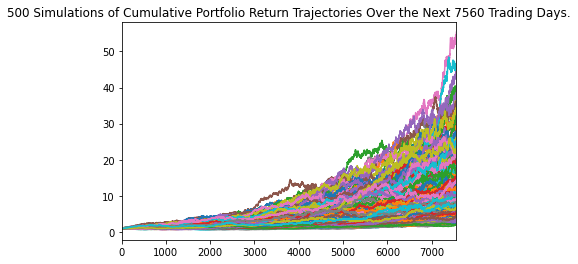

In [21]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_30year_sim_plot.png", bbox_inches="tight")

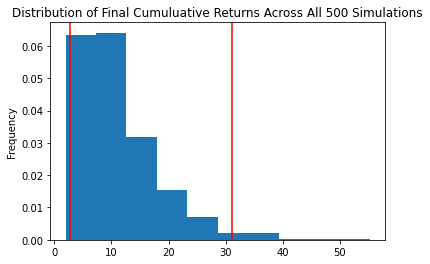

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_30year_dist_plot.png',bbox_inches='tight')

In [23]:
 # Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             11.345167
std               7.313115
min               1.943399
25%               6.058662
50%               9.757410
75%              14.528162
max              55.313315
95% CI Lower      2.754306
95% CI Upper     31.080523
Name: 7560, dtype: float64


#### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [24]:
 # Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $55086.12 and $621610.45


#### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals

In [25]:
# Set initial investment
initial_investment1 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower1 = round(tbl[8]*(20000*1.5),2)
ci_upper1 = round(tbl[9]*(20000*1.5),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment1} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower1} and ${ci_upper1}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $82629.18 and $932415.68


#### Optional Challenge - Early Retirement
Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
start_date5 = pd.Timestamp('2015-10-21', tz='America/New_York').isoformat()
end_date5 = pd.Timestamp('2020-10-21', tz='America/New_York').isoformat()
ticker5 = ["AGG", "SPY"]
    
five_stock_data = alpaca.get_barset(
    ticker5,
    timeframe,
    start=start_date5,
    end=end_date5
).df

# Display sample data
MC_fiveyear = MCSimulation(
    portfolio_data = five_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996109,1.009772,0.991546,0.993802,0.999407,0.995064,1.003347,1.002281,1.011624,0.994444,...,1.008865,0.991697,0.997423,1.004212,0.993265,1.002254,1.007302,0.996481,1.002952,0.995366
2,0.994373,1.011499,0.985547,0.996654,0.996213,0.985969,1.003044,0.996433,1.022281,1.002566,...,1.020882,1.007802,0.995572,1.013597,0.988285,1.000869,1.018329,0.997114,0.992996,0.996765
3,0.996247,1.002839,0.980837,0.996054,0.978378,0.990723,1.003353,0.995755,1.035712,1.003786,...,1.030209,1.006349,1.001273,1.007779,0.994476,1.001816,1.015876,0.996056,0.990492,0.994762
4,1.010735,0.991011,0.988880,0.992669,0.980712,0.998120,0.999389,0.983539,1.038656,0.999840,...,1.033654,1.005344,0.994483,1.012590,0.983795,0.997427,1.015229,1.001401,0.992970,1.002461
5,1.003959,0.994773,0.986440,0.990001,0.987055,0.984651,1.006026,0.980518,1.030362,0.988235,...,1.038541,1.008913,0.993670,1.019245,0.978601,1.003405,1.020671,0.992305,0.985548,0.992078
6,0.993391,0.992198,0.977688,0.984886,0.992609,0.985026,1.007913,0.971052,1.027231,0.986671,...,1.029181,1.001965,1.001043,1.017659,0.989083,1.015810,1.021257,0.997165,0.992490,0.992367
7,1.003770,1.011129,0.976381,0.988201,0.977277,0.993004,1.006577,0.968835,1.028364,0.988068,...,1.031691,1.012405,0.993252,1.024813,1.007333,1.024444,1.017160,1.008547,0.979429,0.999914
8,1.000433,0.998755,0.973775,0.996860,0.989348,0.987483,1.000887,0.968287,1.039205,0.989396,...,1.027499,1.013069,0.998469,1.019851,1.014363,1.025873,1.007753,1.003716,0.987474,1.003410
9,1.016453,0.998997,0.975377,0.998152,0.992834,0.993152,1.001456,0.980797,1.056746,0.981633,...,1.036565,1.005310,0.985789,1.013096,1.017338,1.029119,1.012814,1.002045,0.994087,1.023782


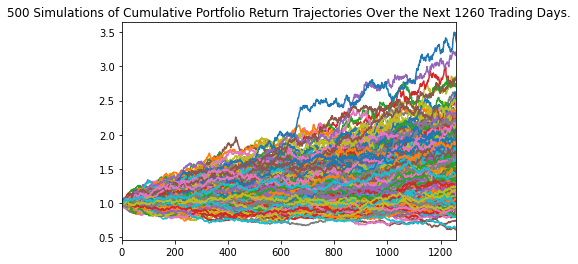

In [28]:
 # Plot simulation outcomes
line_plot_5 = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot_5.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

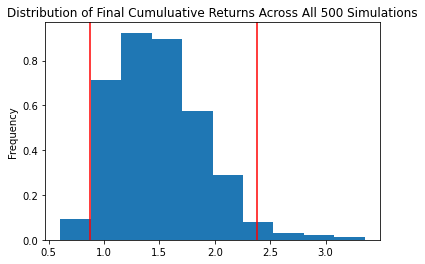

In [29]:
# Plot probability distribution and confidence intervals
dist_plot_5 = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot_5.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.498154
std               0.411890
min               0.606598
25%               1.204727
50%               1.453940
75%               1.747834
max               3.353604
95% CI Lower      0.877865
95% CI Upper      2.382144
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*60000,2)
ci_upper_five = round(tbl_five[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $52671.88 and $142928.62


 ##### Ten Years Retirement Option

In [32]:
 # Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

start_date_10 = pd.Timestamp('2015-10-21', tz='America/New_York').isoformat()
end_date_10 = pd.Timestamp('2020-10-21', tz='America/New_York').isoformat()
ticker_10 = ["AGG", "SPY"]
    
ten_stock_data = alpaca.get_barset(
    ticker_10,
    timeframe,
    start=start_date_10,
    end=end_date_10
).df

# Display sample data
MC_tenyear = MCSimulation(
    portfolio_data = ten_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [33]:
 # Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002131,1.006873,0.987553,0.988810,1.005474,1.010475,0.999087,0.998616,0.995478,1.007512,...,0.992388,1.012096,0.994283,1.017720,1.000825,1.002227,0.998135,0.995772,1.000409,1.004207
2,0.993941,1.007587,0.978303,0.977111,0.999838,1.006309,1.007349,0.999334,0.991141,1.015997,...,1.002226,1.007681,1.012429,1.018717,1.005491,1.014835,0.998738,0.997157,0.999440,1.008882
3,0.984296,0.999458,0.978543,0.980915,0.998497,0.997262,1.009371,0.999173,0.995818,1.019491,...,1.007658,1.011372,1.009816,1.026884,1.006053,1.019878,0.993206,1.005586,1.002087,1.017288
4,0.976247,0.997386,0.968106,0.974917,0.999493,0.987703,1.003567,1.002827,1.005295,1.030251,...,1.015438,1.009516,1.001948,1.032647,0.995209,1.035478,0.981994,1.006145,0.990622,1.003524
5,0.988307,0.993203,0.974791,0.982857,1.006256,0.980622,0.998124,1.003531,1.001550,1.027911,...,1.019333,0.996257,0.996835,1.050239,0.979800,1.058382,0.984832,1.005572,0.984751,1.000660
6,0.984114,0.990876,0.971149,0.969183,0.997299,0.977640,1.004055,1.003947,0.995392,1.022422,...,1.016332,0.997130,0.991351,1.060631,0.973684,1.049750,0.975543,1.015310,0.985297,0.999602
7,0.981063,0.987606,0.969214,0.958120,0.998537,0.978556,0.993762,1.013430,1.011309,1.016145,...,1.033972,1.003002,0.999636,1.055831,0.969763,1.058825,0.970673,1.019495,0.986119,1.002365
8,0.970977,0.980974,0.966525,0.952521,1.000191,0.980073,0.990579,1.015548,1.011510,1.017264,...,1.028538,1.005850,0.990043,1.068611,0.961404,1.043151,0.980046,1.019014,0.990816,1.005117
9,0.970008,0.982492,0.962832,0.948750,0.988090,0.983808,1.000010,1.015998,1.024560,1.033239,...,1.027588,1.004168,0.993768,1.058180,0.964328,1.048011,0.976458,1.018898,0.979802,1.003738


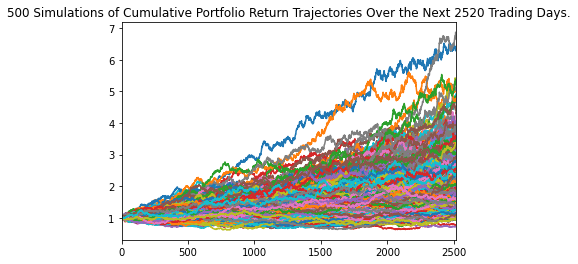

In [34]:
 # Plot simulation outcomes
line_plot_10= MC_tenyear.plot_simulation()

# Save the plot for future usage
line_plot_10.get_figure().savefig("MC_tenyear_sim_plot.png", bbox_inches="tight")

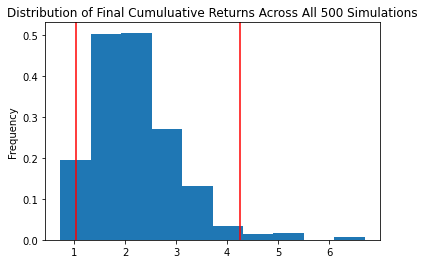

In [35]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_tenyear.plot_distribution()

# Save the plot for future usage
dist_plot_10.get_figure().savefig('MC_tenyear_dist_plot.png',bbox_inches='tight')

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.200078
std               0.843440
min               0.726255
25%               1.586855
50%               2.064024
75%               2.608526
max               6.699747
95% CI Lower      1.037354
95% CI Upper      4.245572
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*60000,2)
ci_upper_ten = round(tbl_ten[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62241.22 and $254734.34
